In [1]:
import findspark
findspark.init()

findspark.find()
import pyspark
findspark.find()
import re
import os

In [2]:
# base packages
import numpy as np
import pandas as pd
from pyspark.sql import SparkSession

In [3]:
sc = SparkSession.builder.appName("spam_classification").\
getOrCreate()

In [4]:
email = sc.read.csv("spam2.csv", header=True, sep=",")
email.show()

+----+--------------------+----+----+----+
|  v1|                  v2| _c2| _c3| _c4|
+----+--------------------+----+----+----+
| ham|Go until jurong p...|null|null|null|
| ham|Ok lar... Joking ...|null|null|null|
|spam|Free entry in 2 a...|null|null|null|
| ham|U dun say so earl...|null|null|null|
| ham|Nah I don't think...|null|null|null|
|spam|FreeMsg Hey there...|null|null|null|
| ham|Even my brother i...|null|null|null|
| ham|As per your reque...|null|null|null|
|spam|WINNER!! As a val...|null|null|null|
|spam|Had your mobile 1...|null|null|null|
| ham|I'm gonna be home...|null|null|null|
|spam|SIX chances to wi...|null|null|null|
|spam|URGENT! You have ...|null|null|null|
| ham|I've been searchi...|null|null|null|
| ham|I HAVE A DATE ON ...|null|null|null|
|spam|XXXMobileMovieClu...|null|null|null|
| ham|Oh k...i'm watchi...|null|null|null|
| ham|Eh u remember how...|null|null|null|
| ham|Fine if that��s t...|null|null|null|
|spam|England v Macedon...|null|null|null|
+----+-----

In [5]:
#rename column
col_header=['label','message']

email = email.withColumnRenamed("v1","label") \
    .withColumnRenamed("v2","message")

In [6]:
cols=['label','message']
df=email[cols]
df=df.dropna()
df.show()

+-----+--------------------+
|label|             message|
+-----+--------------------+
|  ham|Go until jurong p...|
|  ham|Ok lar... Joking ...|
| spam|Free entry in 2 a...|
|  ham|U dun say so earl...|
|  ham|Nah I don't think...|
| spam|FreeMsg Hey there...|
|  ham|Even my brother i...|
|  ham|As per your reque...|
| spam|WINNER!! As a val...|
| spam|Had your mobile 1...|
|  ham|I'm gonna be home...|
| spam|SIX chances to wi...|
| spam|URGENT! You have ...|
|  ham|I've been searchi...|
|  ham|I HAVE A DATE ON ...|
| spam|XXXMobileMovieClu...|
|  ham|Oh k...i'm watchi...|
|  ham|Eh u remember how...|
|  ham|Fine if that��s t...|
| spam|England v Macedon...|
+-----+--------------------+
only showing top 20 rows



In [7]:
spam=df.filter("v1 == 'spam'") 
spam.show()

+-----+--------------------+
|label|             message|
+-----+--------------------+
| spam|Free entry in 2 a...|
| spam|FreeMsg Hey there...|
| spam|WINNER!! As a val...|
| spam|Had your mobile 1...|
| spam|SIX chances to wi...|
| spam|URGENT! You have ...|
| spam|XXXMobileMovieClu...|
| spam|England v Macedon...|
| spam|Thanks for your s...|
| spam|07732584351 - Rod...|
| spam|SMS. ac Sptv: The...|
| spam|Congrats! 1 year ...|
| spam|As a valued custo...|
| spam|Urgent UR awarded...|
| spam|"Did you hear abo...|
| spam|Please call our c...|
| spam|"Your free ringto...|
| spam|GENT! We are tryi...|
| spam|You are a winner ...|
| spam|PRIVATE! Your 200...|
+-----+--------------------+
only showing top 20 rows



In [8]:
spam.count()

1495

In [9]:
ham = df.filter("v1 == 'ham'") 
ham.show()

+-----+--------------------+
|label|             message|
+-----+--------------------+
|  ham|Go until jurong p...|
|  ham|Ok lar... Joking ...|
|  ham|U dun say so earl...|
|  ham|Nah I don't think...|
|  ham|Even my brother i...|
|  ham|As per your reque...|
|  ham|I'm gonna be home...|
|  ham|I've been searchi...|
|  ham|I HAVE A DATE ON ...|
|  ham|Oh k...i'm watchi...|
|  ham|Eh u remember how...|
|  ham|Fine if that��s t...|
|  ham|Is that seriously...|
|  ham|I���m going to tr...|
|  ham|So �_ pay first l...|
|  ham|Aft i finish my l...|
|  ham|Ffffffffff. Alrig...|
|  ham|Just forced mysel...|
|  ham|Lol your always s...|
|  ham|Did you catch the...|
+-----+--------------------+
only showing top 20 rows



In [10]:
ham.count()

9650

In [11]:
print(type(spam))

<class 'pyspark.sql.dataframe.DataFrame'>


In [12]:
y=df['label']
x=df['message']

In [13]:
#convert label to arr
label_list = df.select('label')
label_array = [row.label for row in label_list.collect()]

In [14]:
#convert message to arr
msg_list = df.select('message')
msg_array = [row.message for row in msg_list.collect()]
x=msg_array

In [15]:
from sklearn.preprocessing import LabelEncoder
leb = LabelEncoder()
y=leb.fit_transform(label_array) 

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
cv=CountVectorizer()
lr=LogisticRegression(max_iter=10000)
x_train=cv.fit_transform(x_train)

In [18]:
import time
import scikitplot as skplt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### SVM/SVC

In [19]:
# packages to import
import numpy as np
import pylab as pl
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
random_state = np.random.RandomState(0)

In [20]:
from sklearn.svm import SVC

#Start timing
start_time = time.time()

svm=SVC(probability=True)
svm.fit(x_train,y_train)
pred=svm.predict(cv.transform(x_test))
score=accuracy_score(y_test,pred)
score

print("SVC accuracy: ", score)
print("Run time --- %s seconds ---" % (time.time() - start_time))
print(classification_report(pred,y_test))

SVC accuracy:  0.9946164199192463
Run time --- 87.74972581863403 seconds ---
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1941
           1       0.96      1.00      0.98       288

    accuracy                           0.99      2229
   macro avg       0.98      1.00      0.99      2229
weighted avg       0.99      0.99      0.99      2229



Area under the ROC curve : 0.998179


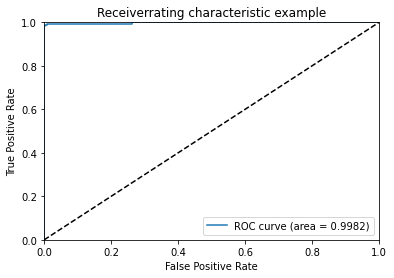

In [21]:
probas_ = svm.fit(x_train, y_train).predict_proba(cv.transform(x_test))
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(np.array(y_test), probas_[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

### Naive Bayes Gaussian

In [22]:
from sklearn.naive_bayes import GaussianNB

start_time = time.time()

nvb = GaussianNB()
nvb.fit(x_train.toarray(), y_train)
y_pred  =  nvb.predict(cv.transform(x_test).toarray())
score=accuracy_score(y_test,y_pred)

print("Naive Bayes Gaussian accuracy: ", score)
print("Run time --- %s seconds ---" % (time.time() - start_time))
print(classification_report(pred,y_test))

Naive Bayes Gaussian accuracy:  0.933602512337371
Run time --- 18.85520339012146 seconds ---
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1941
           1       0.96      1.00      0.98       288

    accuracy                           0.99      2229
   macro avg       0.98      1.00      0.99      2229
weighted avg       0.99      0.99      0.99      2229



Area under the ROC curve : 0.953193


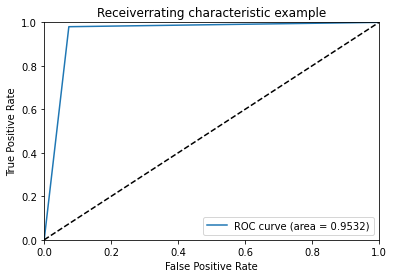

In [23]:
probas_ = nvb.fit(x_train.toarray(), y_train).predict_proba(cv.transform(x_test).toarray())
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(np.array(y_test), probas_[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

### Naive Bayes Multinomial

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
start_time = time.time()

nvbm = make_pipeline(TfidfTransformer(), MultinomialNB())

In [25]:
nvbm.fit(x_train, y_train)
pred = nvbm.predict(cv.transform(x_test).toarray())

In [26]:
score=accuracy_score(y_test,pred)
print("Naive Bayes Multinomial accuracy: ", score)
print("Run time --- %s seconds ---" % (time.time() - start_time))
print(classification_report(pred,y_test))

Naive Bayes Multinomial accuracy:  0.984297891431135
Run time --- 1.907907247543335 seconds ---
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1964
           1       0.88      1.00      0.94       265

    accuracy                           0.98      2229
   macro avg       0.94      0.99      0.96      2229
weighted avg       0.99      0.98      0.98      2229



Area under the ROC curve : 0.991699


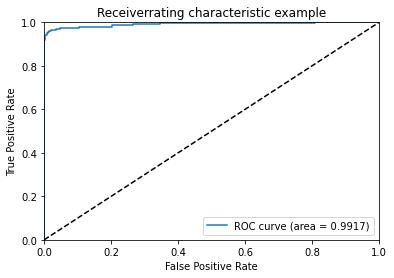

In [27]:
probas_ = nvbm.fit(x_train.toarray(), y_train).predict_proba(cv.transform(x_test).toarray())
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(np.array(y_test), probas_[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

### KNN

In [28]:
start_time = time.time()

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)
y_pred = knn.predict(cv.transform(x_test))
score=accuracy_score(y_test,y_pred)
print("KNN accuracy: ", score)
print("Run time --- %s seconds ---" % (time.time() - start_time))
print(classification_report(pred,y_test))


KNN accuracy:  0.9475100942126514
Run time --- 3.868337631225586 seconds ---
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1964
           1       0.88      1.00      0.94       265

    accuracy                           0.98      2229
   macro avg       0.94      0.99      0.96      2229
weighted avg       0.99      0.98      0.98      2229



Area under the ROC curve : 0.966077


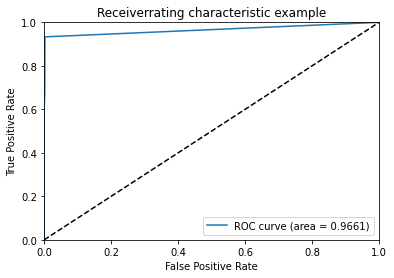

In [29]:
probas_ = knn.fit(x_train, y_train).predict_proba(cv.transform(x_test))
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(np.array(y_test), probas_[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

### Linear Regression

In [30]:
start_time = time.time()

from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(max_iter = 300)
reg.fit(x_train, y_train)
y_pred = reg.predict(cv.transform(x_test))
score=accuracy_score(y_test,y_pred)
score

print("Linear Regression accuracy: ", score)
print("Run time --- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_pred,y_test))

Linear Regression accuracy:  0.9950650515926425
Run time --- 0.8636181354522705 seconds ---
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1940
           1       0.96      1.00      0.98       289

    accuracy                           1.00      2229
   macro avg       0.98      1.00      0.99      2229
weighted avg       1.00      1.00      1.00      2229



Area under the ROC curve : 0.999267


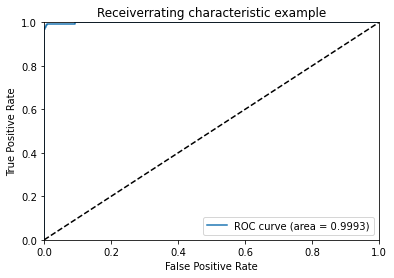

In [31]:
probas_ = reg.fit(x_train, y_train).predict_proba(cv.transform(x_test))
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(np.array(y_test), probas_[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

### Random Forest

In [32]:
start_time = time.time()
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 20, random_state = 0)
# Train the model on training data
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [33]:
# Use the forest's predict method on the test data
y_pred = rf.predict(cv.transform(x_test))
print(type(y_pred))

<class 'numpy.ndarray'>


In [34]:
import sklearn.metrics as metrics
score = accuracy_score(np.round(abs(y_pred)), y_test) 
score

print("Random Forest accuracy: ", score)
print("Run time --- %s seconds ---" % (time.time() - start_time))

Random Forest accuracy:  0.9946164199192463
Run time --- 15.951886892318726 seconds ---
